In [1]:
import numpy as np
from numpy.linalg import cholesky as llt
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
})

In [2]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

def lstsq(A, b):
    M = A.T.dot(A)
    q = A.T.dot(b)
    L = llt(M)
    x = forward_substitution(L, q)
    x = backward_substitution(L.T, x)
    return x, L

In [3]:
# Generate points
def f_straight(x):
    return 3.5 * x + 1.2
N = 50
x = np.random.rand(N)
y = f_straight(x) + 0.1 * np.random.randn(N)    

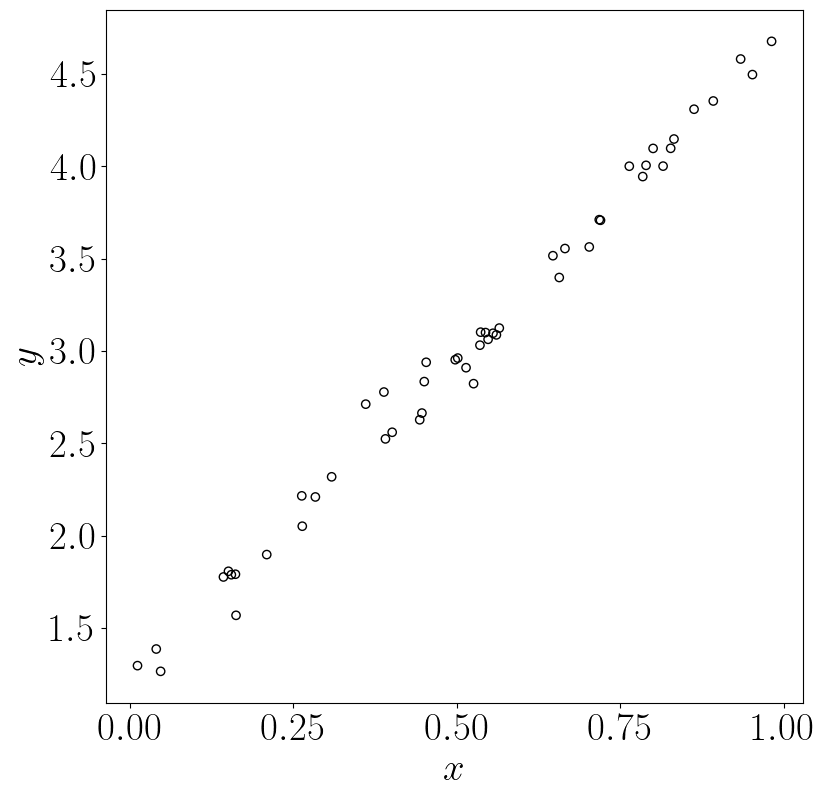

In [4]:
# Plot points
fig, ax = plt.subplots(1,1, figsize=(9, 9))
ax.scatter(x, y, marker='o', color='k', facecolors='none')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.savefig('scatter_1d.pdf')

In [5]:
# Solve least squares
A = np.hstack([np.ones((N, 1)), x.reshape(-1, 1)])
theta, L = lstsq(A, y)

def f_model(x, theta):
    return theta[0] + theta[1] * x

y_hat = f_model(x, theta)

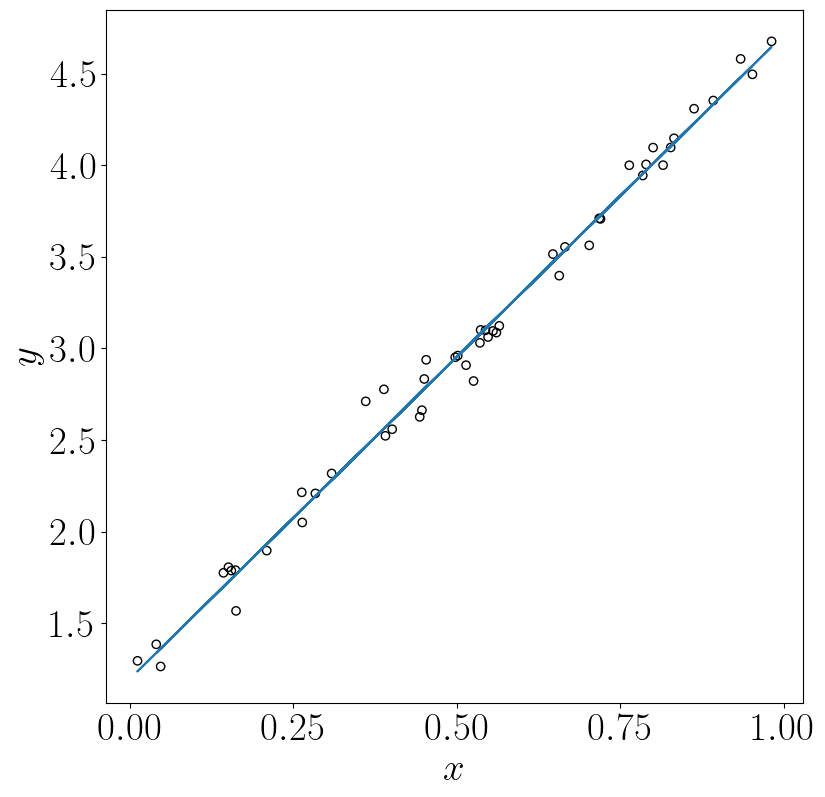

In [6]:
# Plot fit line
fig, ax = plt.subplots(1,1, figsize=(9, 9))
ax.scatter(x, y, marker='o', color='k', facecolors='none')
ax.plot(x, y_hat)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.savefig('scatter_1d_fit.pdf')

In [7]:
theta

array([1.19565842, 3.51506057])